# Homework 3.1 — Solutions

*Homework is designed to both test your knowledge and challenge you to apply familiar concepts to new applications. Answer clearly and completely. You are welcomed and encouraged to work in groups so long as your work is your own. Submit your figures and answers to [Gradescope](https://www.gradescope.com).*

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

#### Q1. Working with a Normal Distribution

The wait times (in minutes) at a restaurant follow a normal distribution with mean $\mu = 12$ minutes and standard deviation $\sigma = 2.5$ minutes. Start each question with a rough sketch of your answer, then find the number using code. Two useful functions from Exercise 3.1:

In [ ]:
# stats.norm.cdf()
# stats.norm.ppf()

a) What is the theoretical mean ($\mu$) wait time *(warm up question)*?



The theoretical mean wait time is $\mu$ = 12 minutes (given directly in the problem).

b) What is the theoretical variance for the wait time *(warm up question)*?

The theoretical variance is $\sigma^2 = 2.5^2 = 6.25$ minutes$^2$.

c) What is the wait time which is longer than exactly 77 percent of wait times *(use python)*?

In [2]:
mu = 12
sigma = 2.5

# 77th percentile
stats.norm.ppf(0.77, mu, sigma)

13.847117122963034

d) What is the probability that a wait time will be greater than 10 minutes *(use python)*?

In [3]:
# P(X > 10) = 1 - P(X <= 10)
1 - stats.norm.cdf(10, mu, sigma)

0.7881446014166034

e) What is the probability the wait time will be between 10 and 14 minutes *(use python)*?

In [4]:
# P(10 < X < 14) = P(X < 14) - P(X < 10)
stats.norm.cdf(14, mu, sigma) - stats.norm.cdf(10, mu, sigma)

0.5762892028332067

f) What is the probability the wait time will be less than 7 or greater than 17 *(use python)*?

In [5]:
# P(X < 7 or X > 17) = P(X < 7) + P(X > 17)
stats.norm.cdf(7, mu, sigma) + (1 - stats.norm.cdf(17, mu, sigma))

0.0455002638963584

---

#### Q2. Sample vs. Population

We know the restaurant's population parameters: $\mu = 12$ and $\sigma = 2.5$. But in the real world, we don't know the population — we only have a sample. In this question, you'll draw samples from the known population and see how well sample statistics approximate population parameters.

a) Use `np.random.normal(12, 2.5, 10)` to draw a sample of $n = 10$ wait times. Compute the sample mean and sample standard deviation (`np.std(sample, ddof=1)`). How do they compare to $\mu$ and $\sigma$?

In [6]:
sample_10 = np.random.normal(12, 2.5, 10)

print(f'Sample mean (n=10):  {np.mean(sample_10):.4f}  (mu = {mu})')
print(f'Sample SD (n=10):    {np.std(sample_10, ddof=1):.4f}  (sigma = {sigma})')

Sample mean (n=10):  12.8396  (mu = 12)
Sample SD (n=10):    2.4066  (sigma = 2.5)


b) Repeat part (a) for $n = 100$ and $n = 1{,}000$. How do the sample statistics change as $n$ increases?

In [7]:
sample_100 = np.random.normal(12, 2.5, 100)
sample_1000 = np.random.normal(12, 2.5, 1000)

print(f'Sample mean (n=100):   {np.mean(sample_100):.4f}  (mu = {mu})')
print(f'Sample SD (n=100):     {np.std(sample_100, ddof=1):.4f}  (sigma = {sigma})')
print()
print(f'Sample mean (n=1000):  {np.mean(sample_1000):.4f}  (mu = {mu})')
print(f'Sample SD (n=1000):    {np.std(sample_1000, ddof=1):.4f}  (sigma = {sigma})')

Sample mean (n=100):   11.5956  (mu = 12)
Sample SD (n=100):     2.5172  (sigma = 2.5)

Sample mean (n=1000):  12.0777  (mu = 12)
Sample SD (n=1000):    2.4889  (sigma = 2.5)


As $n$ increases, the sample mean gets closer to $\mu = 12$ and the sample SD gets closer to $\sigma = 2.5$. Larger samples are more reliable approximations of the population.

c) Plot a histogram of your $n = 1{,}000$ sample. On the same figure, overlay the population PDF using:

```
x = np.linspace(4, 20, 200)
plt.plot(x, stats.norm.pdf(x, 12, 2.5))
```

How well does the sample histogram approximate the population?

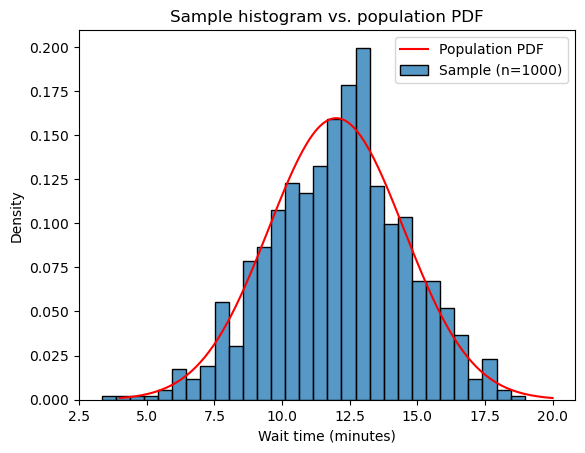

In [8]:
sns.histplot(sample_1000, stat='density', bins=30, label='Sample (n=1000)')
x = np.linspace(4, 20, 200)
plt.plot(x, stats.norm.pdf(x, 12, 2.5), 'r', label='Population PDF')
plt.xlabel('Wait time (minutes)')
plt.title('Sample histogram vs. population PDF')
plt.legend()
plt.show()

The histogram closely matches the population PDF curve. With 1,000 observations, the sample is a very good approximation of the population distribution.

d) In your own words, what is the relationship between a sample and a population? Why do larger samples give us more information about the population?

A sample is a finite set of observations drawn from the population. It gives us partial information about the population, but not the full picture. The sample mean and standard deviation are estimates of the population parameters $\mu$ and $\sigma$. With a small sample, these estimates can be quite far off. With a larger sample, the estimates converge toward the true population values because extreme observations are averaged out and the sample more fully represents the population's shape.